In [ ]:
import pandas as pd
bankloan=pd.read_csv('/content/BANK LOAN.csv')

bankloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SN         700 non-null    int64  
 1   AGE        700 non-null    int64  
 2   EMPLOY     700 non-null    int64  
 3   ADDRESS    700 non-null    int64  
 4   DEBTINC    700 non-null    float64
 5   CREDDEBT   700 non-null    float64
 6   OTHDEBT    700 non-null    float64
 7   DEFAULTER  700 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 43.9 KB


In [ ]:
bankloan['AGE']=bankloan['AGE'].astype('category')

bankloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   SN         700 non-null    int64   
 1   AGE        700 non-null    category
 2   EMPLOY     700 non-null    int64   
 3   ADDRESS    700 non-null    int64   
 4   DEBTINC    700 non-null    float64 
 5   CREDDEBT   700 non-null    float64 
 6   OTHDEBT    700 non-null    float64 
 7   DEFAULTER  700 non-null    int64   
dtypes: category(1), float64(3), int64(4)
memory usage: 39.2 KB


In [ ]:
import statsmodels.formula.api as smf

riskmodel = smf.logit(formula = 'DEFAULTER ~ AGE + EMPLOY + ADDRESS + DEBTINC + CREDDEBT + OTHDEBT', data = bankloan).fit()

Optimization terminated successfully.
         Current function value: 0.395291
         Iterations 7


In [ ]:
riskmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              DEFAULTER   No. Observations:                  700
Model:                          Logit   Df Residuals:                      692
Method:                           MLE   Df Model:                            7
Date:                Fri, 12 May 2023   Pseudo R-squ.:                  0.3120
Time:                        15:24:15   Log-Likelihood:                -276.70
converged:                       True   LL-Null:                       -402.18
Covariance Type:            nonrobust   LLR p-value:                 1.733e-50
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7882      0.264     -2.985      0.003      -1.306      -0.271
AGE[T.2]       0.2520      0.267      0.946      0.344      -0.270       0.774
AGE[T.3]       0.6271      0.361      1.739      0.082      -0.080       1.334
EMPLOY        -0.2617      0.032     -8.211      0.000      -0.324      -0.199
ADDRESS       -0.0996      0.022     -4.459      0.000      -0.143      -0.056
DEBTINC        0.0851      0.022      3.845      0.000       0.042       0.128
CREDDEBT       0.5634      0.089      6.347      0.000       0.389       0.737
OTHDEBT        0.0231      0.057      0.405      0.685      -0.089       0.135
==============================================================================
"""

In [ ]:
riskmodel.pvalues

Intercept    2.836765e-03
AGE[T.2]     3.443260e-01
AGE[T.3]     8.201175e-02
EMPLOY       2.194584e-16
ADDRESS      8.221749e-06
DEBTINC      1.204860e-04
CREDDEBT     2.200952e-10
OTHDEBT      6.851656e-01
dtype: float64

In [ ]:
riskmodel = smf.logit(formula = 'DEFAULTER ~  EMPLOY + ADDRESS + DEBTINC + CREDDEBT', data = bankloan).fit()

riskmodel.pvalues

Optimization terminated successfully.
         Current function value: 0.397671
         Iterations 7


Intercept    1.661361e-03
EMPLOY       5.321029e-18
ADDRESS      3.407071e-05
DEBTINC      1.933174e-06
CREDDEBT     5.173667e-11
dtype: float64

In [ ]:
import numpy as np
conf = riskmodel.conf_int()
conf['OR'] = riskmodel.params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

               2.5%     97.5%        OR
Intercept  0.276905  0.742255  0.453359
EMPLOY     0.742617  0.828950  0.784597
ADDRESS    0.887246  0.958093  0.921989
DEBTINC    1.053295  1.132703  1.092278
CREDDEBT   1.494635  2.104150  1.773397


In [ ]:
bankloan = bankloan.assign(pred=pd.Series(riskmodel.predict()))
bankloan.head(10)

,SN,AGE,EMPLOY,ADDRESS,DEBTINC,CREDDEBT,OTHDEBT,DEFAULTER,pred
0,1,3,17,12,9.3,11.36,5.01,1,0.808347
1,2,1,10,6,17.3,1.36,4.00,0,0.198115
2,3,2,15,14,5.5,0.86,2.17,0,0.010063
3,4,3,15,14,2.9,2.66,0.82,0,0.022160
4,5,1,2,0,17.3,1.79,3.06,1,0.781808
5,6,3,5,5,10.2,0.39,2.16,0,0.216468
6,7,2,20,9,30.6,3.83,16.67,0,0.185632
7,8,3,12,11,3.6,0.13,1.24,0,0.014726
8,9,1,3,4,24.4,1.36,3.28,1,0.748213
9,10,2,0,13,19.7,2.78,2.15,0,0.815256


In [ ]:
from sklearn.metrics import confusion_matrix

predicted_values1 = riskmodel.predict()
threshold=0.3
predicted_class1=np.zeros(predicted_values1.shape)
predicted_class1[predicted_values1>threshold]=1
cm1 = confusion_matrix(bankloan['DEFAULTER'],predicted_class1)
print('Confusion Matrix : \n', cm1)

Confusion Matrix : 
 [[415 102]
 [ 45 138]]


In [ ]:
sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity)

specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Specificity : ', specificity )

Sensitivity :  0.7540983606557377
Specificity :  0.8027079303675049


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(bankloan['DEFAULTER'],predicted_class1))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       517
           1       0.57      0.75      0.65       183

    accuracy                           0.79       700
   macro avg       0.74      0.78      0.75       700
weighted avg       0.82      0.79      0.80       700



In [ ]:
## Checking Model Performance
## ROC
import pandas as pd
bankloan=pd.read_csv('BANK LOAN.csv’)

bankloan['AGE']=bankloan['AGE'].astype('category’)

import statsmodels.formula.api as smf
riskmodel = smf.logit(formula = 'DEFAULTER ~  EMPLOY + ADDRESS + DEBTINC + CREDDEBT', data = bankloan).fit()



In [ ]:
from sklearn.metrics import roc_curve, auc
bankloan=bankloan.assign(pred=riskmodel.predict())
fpr, tpr, thresholds = roc_curve(bankloan['DEFAULTER'], bankloan['pred'])

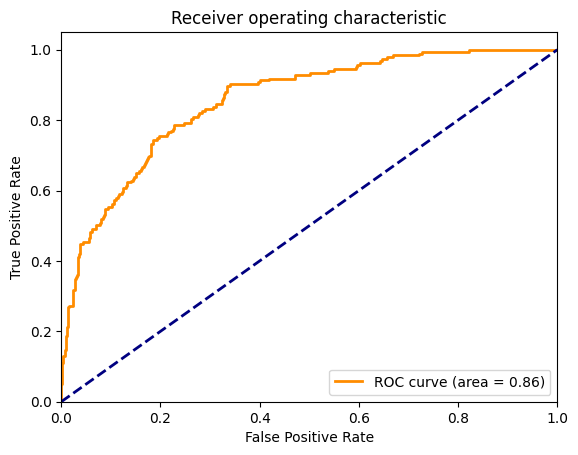

In [ ]:
ruc_auc = auc(fpr,tpr)

import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % ruc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0]);plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate');plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic');plt.legend(loc="lower right")
plt.show()


In [ ]:
print("Area under the ROC curve : %f" % ruc_auc)

Area under the ROC curve : 0.855619


In [ ]:
%pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


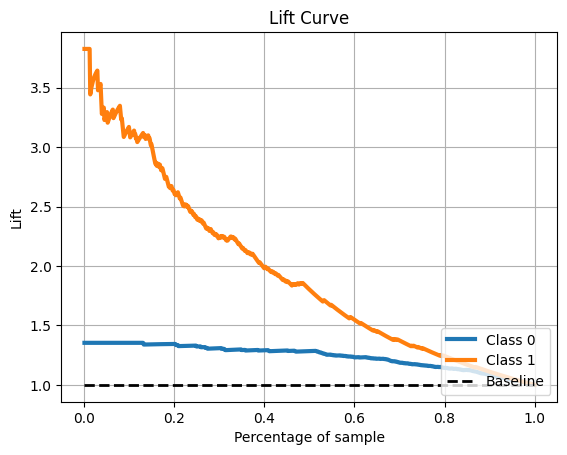

In [ ]:
## Lift Curve
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import scikitplot as skplt

X = bankloan[['EMPLOY', 'ADDRESS', 'DEBTINC', 'CREDDEBT']]
y = bankloan[['DEFAULTER']]
log_model = LogisticRegression()
log_model.fit(X,y)
pred_log = log_model.predict_proba(X)

skplt.metrics.plot_lift_curve(y, pred_log)
plt.show()


In [ ]:
## Kolmogorov-Smirnov Statistic (measure to assess predictive power for marketing or credit risk models)
from scipy.stats import ks_2samp
ks_2samp(bankloan.loc[bankloan.DEFAULTER==0,'pred'], bankloan.loc[bankloan.DEFAULTER==1,'pred'])


KstestResult(statistic=0.561552039403452, pvalue=4.984622730585168e-40, statistic_location=0.18623437807769838, statistic_sign=1)

In [ ]:
## Pearson Residuals
bankloan=bankloan.assign(resid=riskmodel.resid_pearson)

bankloan.head()

,SN,AGE,EMPLOY,ADDRESS,DEBTINC,CREDDEBT,OTHDEBT,DEFAULTER,pred,resid
0,1,3,17,12,9.3,11.36,5.01,1,0.808347,0.486922
1,2,1,10,6,17.3,1.36,4.00,0,0.198115,-0.497052
2,3,2,15,14,5.5,0.86,2.17,0,0.010063,-0.100822
3,4,3,15,14,2.9,2.66,0.82,0,0.022160,-0.150539
4,5,1,2,0,17.3,1.79,3.06,1,0.781808,0.528286


Text(0, 0.5, 'residual')

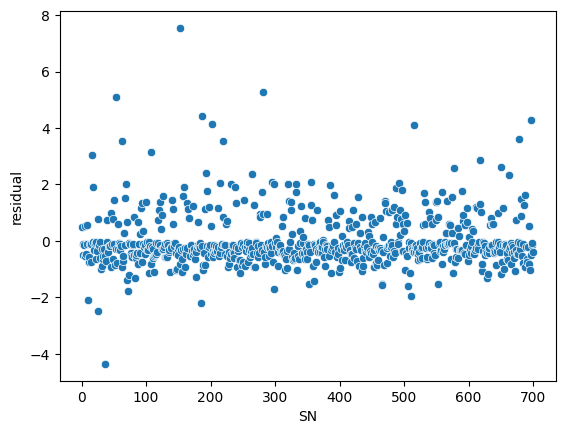

In [ ]:
import seaborn as sns
sns.scatterplot(x='SN',y='resid', data=bankloan); plt.xlabel('SN'); plt.ylabel('residual')

In [ ]:
## MODEL VALIDATION TECHNIQUES (BLR)
## HOLD OUT VALIDATION

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

bankloan=pd.read_csv('BANK LOAN.csv')

X_train, X_test = train_test_split(bankloan, test_size=0.3)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
riskmodel=smf.logit(formula = 'DEFAULTER ~  EMPLOY + ADDRESS + DEBTINC + CREDDEBT', data = X_train).fit()

predicted_values1=riskmodel.predict()
threshold=0.3
predicted_class1=np.zeros(predicted_values1.shape)
predicted_class1[predicted_values1>threshold]=1

from sklearn.metrics import classification_report
print(classification_report(X_train['DEFAULTER'],predicted_class1))

In [ ]:
predicted_values1=riskmodel.predict(X_test)
threshold=0.3
predicted_class1=np.zeros(predicted_values1.shape)
predicted_class1[predicted_values1>threshold]=1

print(classification_report(X_test['DEFAULTER'],predicted_class1))


In [ ]:
## K FOLD CROSS VALIDATION

In [ ]:
from sklearn import linear_model
lmreg = linear_model.LogisticRegression()

y=bankloan.DEFAULTER
X=bankloan[['EMPLOY', 'ADDRESS', 'DEBTINC', 'CREDDEBT']]

from sklearn.model_selection import cross_val_predict
from sklearn.metrics.classification import cohen_kappa_score

predicted_prob = cross_val_predict(lmreg, X, y, cv=4, method='predict_proba') 
threshold=0.3
predicted = predicted_prob[:,1]
predicted_class1=np.zeros(predicted.shape)
predicted_class1[predicted>threshold]=1


In [ ]:
print(classification_report(y,predicted_class1))